### __토픽모델링 참고__
* __https://chaelist.github.io/docs/ml_application/topic_modeling/#%EB%AC%B8%EC%84%9C%EB%B3%84-%ED%86%A0%ED%94%BD-%ED%95%A0%EB%8B%B9|__
* __https://happy-obok.tistory.com/5__
* https://blog.naver.com/PostView.nhn?blogId=upennsolution&logNo=221437143732&categoryNo=8&parentCategoryNo=0
* https://bookdown.org/ahn_media/bookdown-demo/anal1freq.html

<br>

### __감성분석 참고__
* __사전 기반__ vs 머신러닝 기반 
* __https://blog.naver.com/vi_football/221691153127__
* __https://oak.chosun.ac.kr/bitstream/2020.oak/2016/2/%EB%93%9C%EB%9D%BC%EB%A7%88%20%EB%A6%AC%EB%B7%B0%20%EC%86%8D%EC%84%B1%EB%B3%84%20%EA%B0%90%EC%84%B1%EB%B6%84%EB%A5%98%20%EB%B0%A9%EB%B2%95.pdf__
* __https://scienceon.kisti.re.kr/srch/selectPORSrchArticle.do?cn=JAKO201711656579829&dbt=NART__
* https://www.slideshare.net/BOAZbigdata/9-boaz-airbnb-aspect-in-review-131429420
* https://codingstudyroom.tistory.com/68
* https://github.com/Jungjaeyoon/gamereviewTextmining
* https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=real_77&logNo=221434921568
* http://word.snu.ac.kr/kosac/corpus.php
* https://freesoft.dev/program/132843725


# **0. 준비**

In [5]:
from google.colab import drive
drive._mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import nltk;import pandas as pd;import numpy as np
from nltk.stem.snowball import SnowballStemmer;from nltk import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer; from sklearn import linear_model
from sklearn.model_selection import KFold
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from matplotlib import pyplot as plt
!pip install lda
import lda

import pandas as pd
import numpy as np
import re
import os
import sys
import json

#!pip install git+https://github.com/haven-jeon/PyKoSpacing.git
!pip install konlpy
!pip install soynlp

#from pykospacing import Spacing
from konlpy.tag import Kkma, Komoran, Okt, Mecab
import soynlp

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
import re
import collections
import itertools
!pip install lda
import lda
import requests
import csv
import time
import math
import operator
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import Counter
from collections import defaultdict
from pandas import read_table
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# __1. 토픽모델링__
* __(1) 상품별로 안하고 전체 상품에 대해서 토픽모델링 진행__
* 대신 토픽을 좀 여러 개로 나누고 리뷰 별로 토픽 할당
* 각 상품의 주요 토픽은 가장 많이 나온 토픽 1-2개 정도로 선정
* __(2) 카테고리 내 모든 상품 vs 카테고리 불문 모든 상품__
* 이건 서랍장/의자 전체에 대해서 토픽모델링 비교해보고 판단

### 전처리

In [1]:
# 데이터 불러오기 및 합치기 
import pandas as pd
# df_origin = pd.read_csv('/content/drive/Shareddrives/컨퍼런스/김다희/console/console_final.csv', encoding='utf-8').iloc[:, 1:]
# df_morph = pd.read_csv('/content/drive/Shareddrives/컨퍼런스/김다희/morphs_console_0119.csv', encoding='utf-8', index_col=0)
# df_origin = pd.read_csv('/content/drive/Shareddrives/컨퍼런스/김다희/drawer/drawer_final.csv', encoding='utf-8').iloc[:, 1:]
# df_morph = pd.read_csv('/content/drive/Shareddrives/컨퍼런스/김다희/morphs_drawer_0119.csv', encoding='utf-8', index_col=0)
# df_origin = pd.read_csv('/content/drive/Shareddrives/컨퍼런스/성예슬/sofa_total.csv', encoding='utf-8').iloc[:, 1:]
# df_morph = pd.read_csv('/content/drive/Shareddrives/컨퍼런스/성예슬/morphs_sofa_0120.csv', encoding='utf-8', index_col=0)
df_origin = pd.read_csv('/content/drive/Shareddrives/컨퍼런스/성예슬/bed_total.csv', encoding='utf-8').iloc[:, 1:]
df_morph = pd.read_csv('/content/drive/Shareddrives/컨퍼런스/성예슬/morphs_bed_0120.csv', encoding='utf-8', index_col=0)
# df_origin = pd.read_csv('/content/drive/Shareddrives/컨퍼런스/성예슬/sofabed_total.csv', encoding='utf-8').iloc[:, 1:]
# df_morph = pd.read_csv('/content/drive/Shareddrives/컨퍼런스/성예슬/morphs_sofabed_0120.csv', encoding='utf-8', index_col=0)
df = pd.concat([df_origin, df_morph], axis=1)
df_morph.head()

# 상품별 데이터프레임 생성 -> 상품별로 하지 말고 가구 전체에 대해서 토픽모델링 
# name_list = df['item_name'].unique().tolist()
# for i, name in enumerate(name_list):
#   globals()['df{}'.format(i+1)] = df[df['item_name']==name].reset_index(drop=True)

# 토픽모델링을 위한 단어 리스트 만들기
word_list = []
for i in range(len(df)):
  temp_list = df.iloc[i, 19:].tolist() 
  temp_list = [x for x in temp_list if pd.isnull(x)==False] # nan 제거 
  temp_str = ' '.join(temp_list) # list -> str
  word_list.append(temp_str)

review_df = df.copy()
print(len(word_list))
print(len(review_df))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247

197792
197792


### 토픽모델링

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 0. 자주 바꾸는 변수
n_topic = 8 # 토픽 수
n_word = 30 # 토픽별로 뽑을 가장 연관성 높은 단어 수


# 1. Vector화
#LDA 는 Count기반의 Vectorizer만 적용 
count_vectorizer = CountVectorizer(max_df=0.1, max_features=1000, min_df=2, ngram_range=(1,2))
    # 2개의 문서 미만으로 등장하는 단어는 제외, 전체의 10% 이상으로 자주 등장하는 단어는 제외
    # bigram도 포함

feat_vect = count_vectorizer.fit_transform(word_list) # 오류 -> 해결(list->str)
print('CountVectorizer Shape:', feat_vect.shape)

# 2. 토픽모델링: LDA
lda = LatentDirichletAllocation(n_components=n_topic)  # 토픽 수 설정
lda.fit(feat_vect)
LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=n_topic, n_jobs=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

# 3. 토픽별 연관어 출력
def display_topics(model, feature_names, num_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index+1)

        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환. 
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:num_top_words]
        
        # top_indexes대상인 index별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])                
        print(feature_concat)

# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vectorizer.get_feature_names()

# Topic별 가장 연관도가 높은 word n개 추출
display_topics(lda, feature_names, n_word)

CountVectorizer Shape: (197792, 1000)
Topic # 1
이쁘다 디자인 예쁘다 빠르다 기사 친절하다 깔끔하다 가성비 마음 배송 기사 엄청 너무 친절하다 너무 좋다 만족 설치 해주다 마음 들다 감사하다 배송 빠르다 너무 예쁘다 빨르다 기사 너무 가격 색상 너무 이쁘다 내구성 좋다 배송 최고 안나 가성비 좋다 가격대비 설치 기사
Topic # 2
냄새 나무 나다 부분 깔다 닦다 괜찮다 쓸다 그냥 정도 마감 많이 조금 보다 올리다 나오다 빠지다 냄새 나다 한번 아니다 나무 냄새 되다 가루 묻다 사용 심하다 처음 쓰다 먼지 많다
Topic # 3
사용 사용 하다 사다 가격 편하다 푹신하다 넘다 저렴하다 너무 좋다 고민 자다 사용 적당하다 딱딱하다 보다 괜찮다 사용 있다 고민 하다 허리 넘다 좋다 자다 사다 눕다 선택 해보다 무난 아프다 하다 좋다 가격 저렴하다 진짜 정말 느낌
Topic # 4
쓰다 서랍 소리 높다 되다 바닥 삐걱 높이 자다 쓰다 근데 아니다 조금 거리 쓰다 있다 그냥 나다 넣다 빼다 그래도 괜찮다 불편하다 부분 그렇다 아쉽다 프레임 다리 낮다 고정 보다 소리 나다
Topic # 5
사이즈 구매 구매 하다 맞다 싱글 프레임 깔다 주문 주문 하다 보다 사다 슈퍼 슈퍼 싱글 제품 크다 구입 구입 하다 작다 고민 사이즈 맞다 침대 프레임 써다 원목 보이다 찾다 놓다 예쁘다 싱글 사이즈 조금 크기
Topic # 6
공간 수납 공간 많이 넓다 많다 서랍 아주 헤드 들어가다 넣다 되다 넉넉하다 있다 좋다 조명 콘센트 정말 높다 너무 좋다 좁다 공간 많다 좋다 수납 깔끔하다 크다 수납 하다 아주 좋다 정리 부분 하다 있다 되어다 방이
Topic # 7
조립 혼자 빨리 마음 추천 빨리 오다 조립 하다 무겁다 힘들다 옮기다 마음 들다 추천 하다 여자 쉬다 무거워 엄청 설치 하다 여자 혼자 조립 해주다 듭니 좋아하다 조금 드리다 마음 듭니 어렵다 이사 편하다 쉽다 생각 빨리 무게
Topic # 8
받다 걸리다 가다 배송비 시간 주문 되다 기

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### 결과

In [ ]:
# 4. LDA 시각화: pyLDAvis
!pip install pyLDAvis
import pyLDAvis.sklearn  # sklearn의 ldamodel에 최적화된 라이브러리

pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda, feat_vect, count_vectorizer)
pyLDAvis.display(vis)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [ ]:
# 5. ⁣각 문서별로 가장 가까운 topic으로 할당

# 문서별로 가장 확률이 높은 topic으로 할당해줌
doc_topic = lda.transform(feat_vect)
doc_per_topic_list = []
for n in range(doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()
    topic_pr = doc_topic[n].max()
    doc_per_topic_list.append([n, topic_most_pr, topic_pr])
    
doc_topic_df = pd.DataFrame(doc_per_topic_list, columns=['Doc_Num', 'Topic', 'Percentage'])
#display(doc_topic_df.head())

# 실제 리뷰와 조인 
doc_topic_df = doc_topic_df.join(df)
#display(doc_topic_df.tail())
#doc_topic_df.to_csv('topic_sofa_0119.csv', encoding='utf-8')

# # 6. 토픽별 문서 수 계산 
# display(doc_topic_df.groupby('Topic')[['Doc_Num']])

# # 7. 토픽별 가장 높은 확률로 할당된 문서 top3 확인
# for topic in range(len(doc_topic_df['Topic'].unique())):
#     print('Topic #', topic+1, '-----------------------------')
#     top_pr_topics = doc_topic_df[doc_topic_df['Topic'] == topic].sort_values(by='Percentage', ascending=False)
#     print(top_pr_topics['review'].iloc[0])
#     print(top_pr_topics['review'].iloc[1])
#     print(top_pr_topics['review'].iloc[2], '\n')

Topic # 1 -----------------------------


In [ ]:
# 8. 토픽모델링 결과 저장 

# 토픽별 연관도 높은 단어 30개 추출
def topics_words(model, feature_names, num_top_words):
    res = []
    for topic_index, topic in enumerate(model.components_):
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:num_top_words]
        feature_concat = ','.join([feature_names[i] for i in top_indexes])
        res.append(feature_concat)              
    return res

feature_names = count_vectorizer.get_feature_names()
topic_word = topics_words(lda, feature_names, 30)

# 토픽별 단어 매핑
def topics_words_mapping(x):
  return topic_word[x]

topic_df = pd.DataFrame(doc_per_topic_list, columns=['ReviewNum', 'Topic', 'Percentage'])
topic_df['TopicWords'] = topic_df['Topic'].apply(topics_words_mapping)

# 토픽모델링 결과를 포함한 데이터프레임 내보내기
review_topic_df = topic_df.join(df)
#review_topic_df.to_csv('/content/drive/Shareddrives/컨퍼런스/성예슬/topics_sofa_0120.csv', encoding='utf-8')
review_topic_df.to_csv('/content/drive/Shareddrives/컨퍼런스/성예슬/topics_bed_0120.csv', encoding='utf-8')
#review_topic_df.to_csv('/content/drive/Shareddrives/컨퍼런스/성예슬/topics_sofabed_0120.csv', encoding='utf-8')
review_topic_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# __2. 감성분석__
* https://oak.chosun.ac.kr/bitstream/2020.oak/2016/2/%EB%93%9C%EB%9D%BC%EB%A7%88%20%EB%A6%AC%EB%B7%B0%20%EC%86%8D%EC%84%B1%EB%B3%84%20%EA%B0%90%EC%84%B1%EB%B6%84%EB%A5%98%20%EB%B0%A9%EB%B2%95.pdf
* https://scienceon.kisti.re.kr/srch/selectPORSrchArticle.do?cn=JAKO201711656579829&dbt=NART


* __감성분석 방향성__
* 토픽별 감성분석 vs 속성별 감성분석 
* 토픽은 상품 설명정도로 반영하고 속성별 감성분석이 나을 것 같음
* 대신 토픽모델링 결과를 최대한 우리 4가지 속성(디자인/내구성/가격/배송)에 끼워넣기
* 토픽모델링 결과 -> 토픽/토픽단어 
* 토픽 -> 속성과 연결
* 토픽단어 -> 키워드(명사)/감성어휘(형용사, 동사)
* 키워드 -> 키워드가 들어있는 문장(리뷰) 추출 
* 감성어휘 -> 해당 문장에서 등장한 감성이 드러나는 단어 추출
* 감성점수 -> 기존 감성사전 및 우리가 추가해서 점수 산출


* __감성분석 프로세스__
1. 데이터 전처리 -> 완료
2. 속성단어 유사어 추출 -> 토픽모델링(토픽/토픽단어) 
3. 속성사전 구축 -> 속성과 토픽 연결(1:n)
4. 속성별 문장 분류 -> 속성사전 중 명사(키워드)
5. 속성별 감성어휘 추출 -> 속성사전 중 형용사, 동사(감성어휘)
6. 속성별 감성점수 산출 -> 기존 감성사전 및 필요하면 추가 구축(회귀계수 이용)

* __감성분석 수정(0120)__ 
* 처음엔 토픽모델링 결과를 써서 감성분석 하려했는데 토픽이랑 우리 속성이 너무 안 맞음
* 토픽모델링은 리뷰 속성이 정해지지 않은 경우에 토픽별로 감성분석 하기위해 주로 사용하는 것 같은데 우리는 이미 속성이 정해져 있어서 그거랑 연결하느라 더 어려운 듯 
* 다른 방법이 있을 수도 있지만...일단 내 수준에선 너무 어려워서ㅠㅠㅜ 속성별 키워드 단어를 임의로 설정하고 그게 포함된 리뷰의 감성어휘 뽑아서 감성점수 내기로 함 
* 그 과정에서 토픽모델링 결과를 참고할 수도 있고 어찌됐든 상품의 #해시태그를 토픽모델링을 이용해서 달게 되니까 토픽모델링을 폐기할 필요는 없음! 글고 이렇게 되면 아예 카테고리 불문 상품 전체로 하는게 좋을 것 같음 


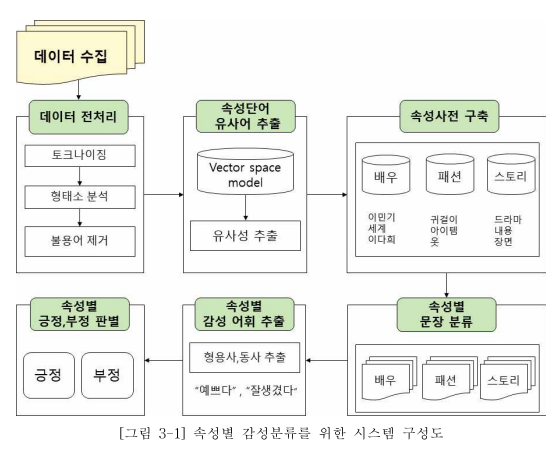

### 속성사전 구축 
* __속성-토픽 연결__
* 내구성 토픽
* 디자인 토픽
* 가격 토픽
* 배송 토픽

### 속성별 문장 분류
* 내구성 키워드
* 디자인 키워드
* 가격 키워드
* 배송 키워드

### 속성별 감성어휘 추출 
* 내구성 감성어휘
* 디자인 감성어휘
* 가격 감성어휘
* 배송 감성어휘

### *속성별 감성점수 산출
* https://blog.naver.com/vi_football/221691153127
* KNU + KOSAC + 사용자정의사전